In [ ]:
#importing required libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#loading data from SQL
import mysql.connector

In [49]:
db = mysql.connector.connect(host = 'localhost', user = 'root', password = '12345',
                               database = 'francisdatabase')

In [50]:
cur = db.cursor()

In [51]:
cur.execute("SELECT * FROM cement_sales_last2")

In [52]:
myresult = cur.fetchall()

In [53]:
df = pd.DataFrame(myresult, columns=[i[0] for i in cur.description])

In [54]:
df

,ID,date,sales_in_million_rs,demand_mmt,trans_cost,advert_cost
0,1,1-Apr-10,13.50,23.875925,276.79,25.364
1,2,1-May-10,14.20,24.797650,289.35,26.953
2,3,1-Jun-10,11.23,18.247675,351.05,27.541
3,4,1-Jul-10,11.50,18.493708,420.39,29.898
4,5,1-Aug-10,11.90,20.136737,470.64,24.364
...,...,...,...,...,...,...
148,149,1-Aug-22,44.64,19.024715,10677.84,840.910
149,150,1-Sep-22,43.65,19.982687,10761.47,849.740
150,151,1-Oct-22,35.90,22.459898,10899.79,862.030
151,152,1-Nov-22,35.00,26.236157,10905.59,879.340


In [2]:
#loading data
cement = pd.read_csv('B:/d/Project/final code and data/cement_sales_last2.csv')

In [3]:
cement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   153 non-null    int64  
 1   date                 153 non-null    object 
 2   sales_in_million_rs  153 non-null    float64
 3   demand_mmt           153 non-null    float64
 4   trans_cost           153 non-null    float64
 5   advert_cost          153 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.3+ KB


In [4]:
cement.shape

(153, 6)

In [5]:
cement.columns

Index(['ID', 'date', 'sales_in_million_rs', 'demand_mmt', 'trans_cost',
       'advert_cost'],
      dtype='object')

In [6]:
cement.head()

,ID,date,sales_in_million_rs,demand_mmt,trans_cost,advert_cost
0,1,1-Apr-10,13.50,23.875925,276.79,25.364
1,2,1-May-10,14.20,24.797650,289.35,26.953
2,3,1-Jun-10,11.23,18.247675,351.05,27.541
3,4,1-Jul-10,11.50,18.493708,420.39,29.898
4,5,1-Aug-10,11.90,20.136737,470.64,24.364


In [8]:
cement.tail()

,ID,date,sales_in_million_rs,demand_mmt,trans_cost,advert_cost
148,149,22-Aug,44.64,19.024715,10677.84,840.91
149,150,22-Sep,43.65,19.982687,10761.47,849.74
150,151,22-Oct,35.90,22.459898,10899.79,862.03
151,152,22-Nov,35.00,26.236157,10905.59,879.34
152,153,22-Dec,41.30,27.477699,10935.38,863.94


In [7]:
#Data cleaning
cement.isnull().sum()

ID                     0
date                   0
sales_in_million_rs    0
demand_mmt             0
trans_cost             0
advert_cost            0
dtype: int64

In [8]:
cement.duplicated().sum()

0

In [9]:
cement.var()

C:\Users\john\AppData\Local\Temp\ipykernel_1500\3483865972.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cement.var()


ID                     1.963500e+03
sales_in_million_rs    1.083933e+02
demand_mmt             1.403190e+01
trans_cost             9.434530e+06
advert_cost            6.805106e+04
dtype: float64

Text(0.5, 1.0, 'sales in million rs')

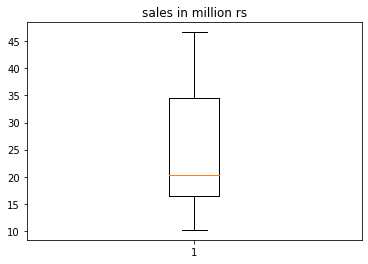

In [10]:
#checking for outliers
plt.boxplot(cement.sales_in_million_rs); plt.title('sales in million rs')

Text(0.5, 1.0, 'demand in million tons')

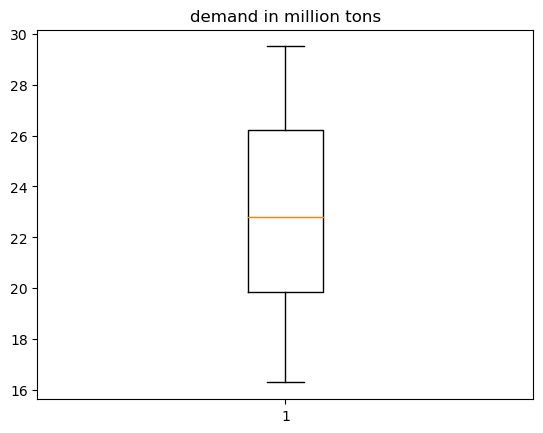

In [52]:
plt.boxplot(cement.demand_mmt); plt.title('demand in million tons') 

Text(0.5, 1.0, 'transportation cost')

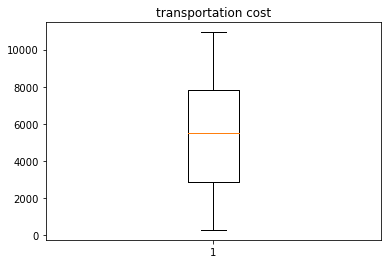

In [11]:
plt.boxplot(cement.trans_cost); plt.title('transportation cost')

Text(0.5, 1.0, 'advertisement cost')

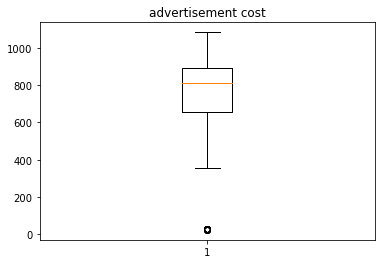

In [12]:
plt.boxplot(cement.advert_cost); plt.title('advertisement cost') #yes

In [10]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [16]:
#Outliers Treatment
from feature_engine.outliers import Winsorizer

ModuleNotFoundError: No module named 'feature_engine.outliers'

In [14]:
import feature_engine

In [2]:
Winso = Winsorizer(capping_method = 'iqr', fold=1.5, tail = 'both', variables=['advert_cost'])

cement['advert_cost'] = Winso.fit_transform(cement[['advert_cost']])

NameError: name 'Winsorizer' is not defined

Text(0.5, 1.0, 'advertisement cost')

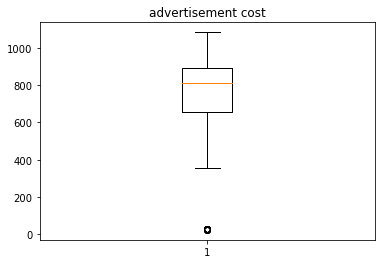

In [17]:
plt.boxplot(cement.advert_cost); plt.title('advertisement cost') #yes

In [18]:
#AUTO EDA
from pandas_profiling import ProfileReport
autoeda = ProfileReport(cement, explorative= True)
autoeda

C:\Users\john\AppData\Local\Temp\ipykernel_1500\432149481.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
###EXPLORATORY DATA ANALYSIS

#First business moment (Measures of Central Tendency)

#mean
cement.sales_in_million_rs.mean()

24.60679738562091

In [59]:
cement.demand_mmt.mean()

23.098894273986925

In [60]:
cement.trans_cost.mean()

5409.589346405229

In [61]:
cement.advert_cost.mean()

755.7319372549016

In [62]:
#mode
cement.sales_in_million_rs.mode()

0    18.5
Name: sales_in_million_rs, dtype: float64

In [63]:
cement.demand_mmt.mode()

0    23.060595
Name: demand_mmt, dtype: float64

In [64]:
cement.trans_cost.mode()

0        276.79
1        289.35
2        351.05
3        420.39
4        470.64
         ...   
148    10677.84
149    10761.47
150    10899.79
151    10905.59
152    10935.38
Name: trans_cost, Length: 153, dtype: float64

In [65]:
cement.advert_cost.mode()

0    307.975
Name: advert_cost, dtype: float64

In [66]:
#Median
cement.sales_in_million_rs.median()

20.4

In [67]:
cement.demand_mmt.median()

22.78824147

In [68]:
cement.trans_cost.median()

5514.54

In [69]:
cement.advert_cost.median()

813.3

In [70]:
#Second Business Moment(Measures of Dispersion)

#variance
cement.sales_in_million_rs.var()

108.39325743894051

In [71]:
cement.demand_mmt.var()

14.031900936753052

In [72]:
cement.trans_cost.var()

9434529.87363247

In [73]:
cement.advert_cost.var()

42491.48176168287

In [74]:
#standard deviation
cement.sales_in_million_rs.std()

10.411208260280866

In [75]:
cement.demand_mmt.std()

3.7459179030983916

In [76]:
cement.trans_cost.std()

3071.5679829091314

In [77]:
cement.advert_cost.std()

206.13462048303015

In [78]:
#range
cement.sales_in_million_rs.max() - cement.sales_in_million_rs.min()

36.45

In [79]:
cement.demand_mmt.max() - cement.demand_mmt.min()

13.19813586

In [80]:
cement.trans_cost.max() - cement.trans_cost.min()

10658.589999999998

In [81]:
cement.advert_cost.max() - cement.advert_cost.min()

775.6959999999999

In [82]:
#Third business moment 
#skewness
cement.sales_in_million_rs.skew()

0.6908783705609095

In [83]:
cement.demand_mmt.skew()

0.01443473093516599

In [84]:
cement.trans_cost.skew()

-0.016344735745578695

In [85]:
cement.advert_cost.skew()

-0.8402640004314429

In [86]:
#Fourth business moment
#Kurtosis
cement.sales_in_million_rs.kurt()

-0.9026818240193566

In [87]:
cement.demand_mmt.kurt()

-1.1318395642400008

In [88]:
cement.trans_cost.kurt()

-1.125921185169364

In [89]:
cement.advert_cost.kurt()

-0.05266108260623659

Text(0.5, 1.0, 'sales in million rs')

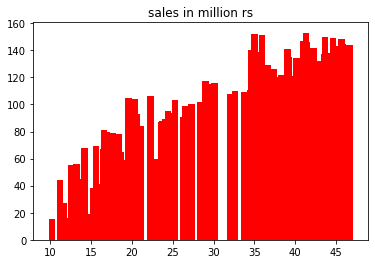

In [11]:
#Univariate Analysis

#Bar plot
plt.bar(x = cement.sales_in_million_rs, height = np.arange(1, 154, 1), color = 'red'); plt.title('sales in million rs')

Text(0.5, 1.0, 'demand in million tons')

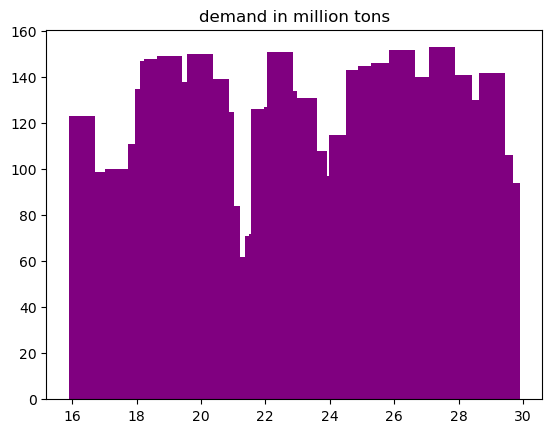

In [91]:
plt.bar(x = cement.demand_mmt, height = np.arange(1, 154, 1), color = 'purple'); plt.title('demand in million tons')

Text(0.5, 1.0, 'transportation cost')

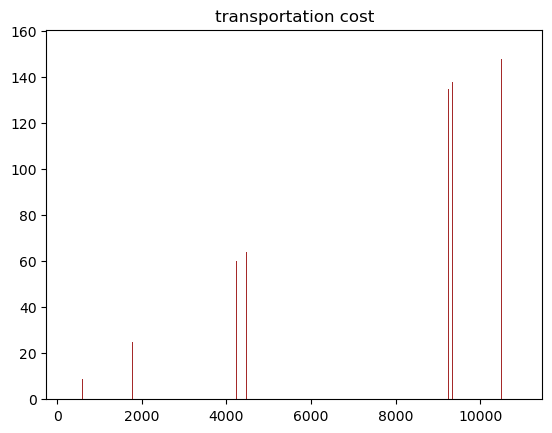

In [92]:
plt.bar(x = cement.trans_cost, height = np.arange(1, 154, 1), color = 'brown'); plt.title('transportation cost')

Text(0.5, 1.0, 'advertisement cost')

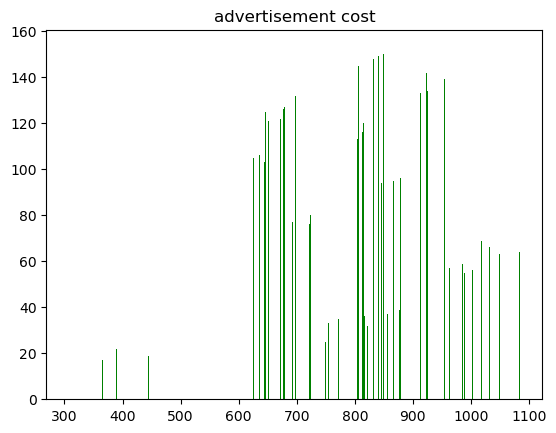

In [93]:
plt.bar(x = cement.advert_cost, height = np.arange(1, 154, 1), color = 'green'); plt.title('advertisement cost')

Text(0.5, 1.0, 'histogram sales_in_million_rs')

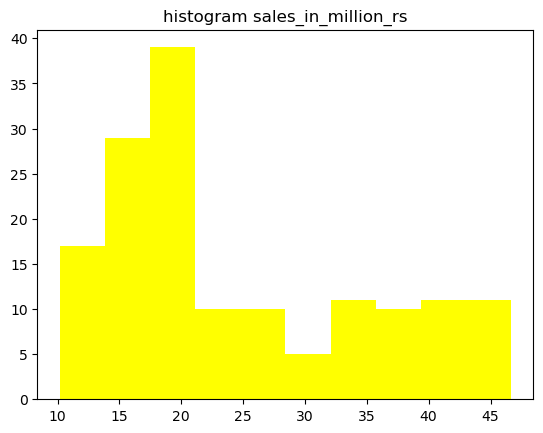

In [94]:
#Histogram
plt.hist(cement.sales_in_million_rs, color = 'yellow'); plt.title('histogram sales_in_million_rs')

Text(0.5, 1.0, 'histogram demand_mmt')

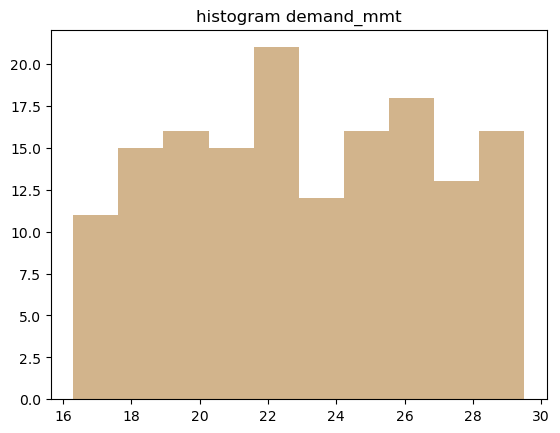

In [95]:
plt.hist(cement.demand_mmt, color = 'tan'); plt.title('histogram demand_mmt')

Text(0.5, 1.0, 'histogram transportation cost')

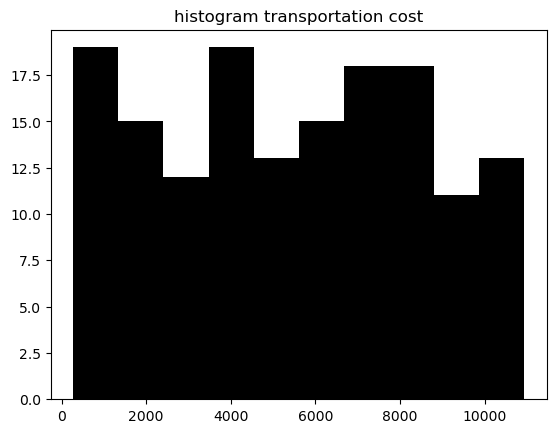

In [96]:
plt.hist(cement.trans_cost, color = 'black'); plt.title('histogram transportation cost')

Text(0.5, 1.0, 'histogram advertisement cost')

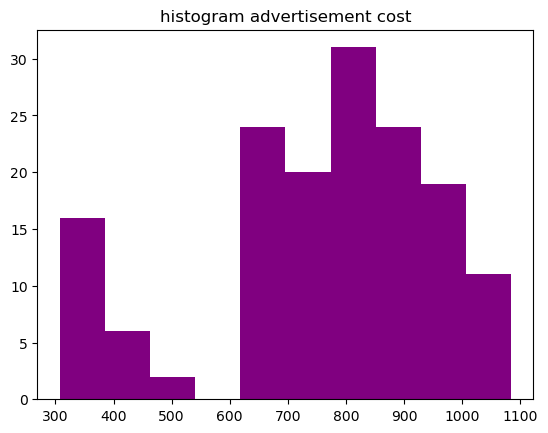

In [97]:
plt.hist(cement.advert_cost,  color = 'purple'); plt.title('histogram advertisement cost')

In [98]:
#Probplot
import scipy.stats as stats

In [99]:
import pylab

((array([-2.61052811, -2.29138561, -2.10856779, -1.97716758, -1.87303555,
         -1.7859691 , -1.71065377, -1.64395339, -1.58385546, -1.52898807,
         -1.47837218, -1.43128353, -1.38717057, -1.34560313, -1.3062389 ,
         -1.26880082, -1.23306129, -1.19883096, -1.16595048, -1.13428444,
         -1.10371673, -1.07414696, -1.04548773, -1.01766246, -0.9906036 ,
         -0.96425128, -0.93855212, -0.91345834, -0.88892699, -0.86491927,
         -0.8414    , -0.8183372 , -0.79570167, -0.77346668, -0.75160767,
         -0.73010204, -0.7089289 , -0.68806892, -0.66750414, -0.64721786,
         -0.62719452, -0.60741954, -0.58787931, -0.56856101, -0.54945261,
         -0.53054277, -0.51182078, -0.4932765 , -0.47490033, -0.45668315,
         -0.43861629, -0.42069149, -0.40290086, -0.38523685, -0.36769224,
         -0.35026009, -0.33293374, -0.31570677, -0.298573  , -0.28152644,
         -0.2645613 , -0.24767197, -0.23085299, -0.21409908, -0.19740505,
         -0.18076586, -0.16417656, -0.

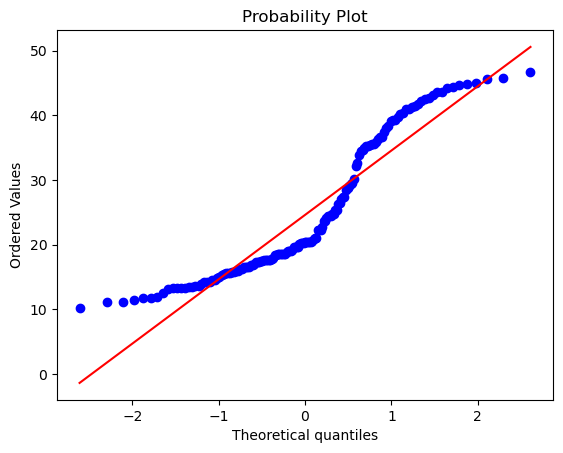

In [100]:
stats.probplot(cement.sales_in_million_rs, dist = 'norm', plot = pylab)

((array([-2.61052811, -2.29138561, -2.10856779, -1.97716758, -1.87303555,
         -1.7859691 , -1.71065377, -1.64395339, -1.58385546, -1.52898807,
         -1.47837218, -1.43128353, -1.38717057, -1.34560313, -1.3062389 ,
         -1.26880082, -1.23306129, -1.19883096, -1.16595048, -1.13428444,
         -1.10371673, -1.07414696, -1.04548773, -1.01766246, -0.9906036 ,
         -0.96425128, -0.93855212, -0.91345834, -0.88892699, -0.86491927,
         -0.8414    , -0.8183372 , -0.79570167, -0.77346668, -0.75160767,
         -0.73010204, -0.7089289 , -0.68806892, -0.66750414, -0.64721786,
         -0.62719452, -0.60741954, -0.58787931, -0.56856101, -0.54945261,
         -0.53054277, -0.51182078, -0.4932765 , -0.47490033, -0.45668315,
         -0.43861629, -0.42069149, -0.40290086, -0.38523685, -0.36769224,
         -0.35026009, -0.33293374, -0.31570677, -0.298573  , -0.28152644,
         -0.2645613 , -0.24767197, -0.23085299, -0.21409908, -0.19740505,
         -0.18076586, -0.16417656, -0.

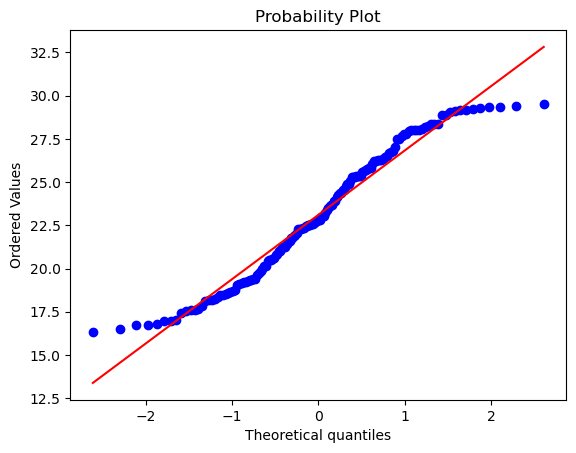

In [101]:
stats.probplot(cement.demand_mmt, dist = 'norm', plot = pylab)

((array([-2.61052811, -2.29138561, -2.10856779, -1.97716758, -1.87303555,
         -1.7859691 , -1.71065377, -1.64395339, -1.58385546, -1.52898807,
         -1.47837218, -1.43128353, -1.38717057, -1.34560313, -1.3062389 ,
         -1.26880082, -1.23306129, -1.19883096, -1.16595048, -1.13428444,
         -1.10371673, -1.07414696, -1.04548773, -1.01766246, -0.9906036 ,
         -0.96425128, -0.93855212, -0.91345834, -0.88892699, -0.86491927,
         -0.8414    , -0.8183372 , -0.79570167, -0.77346668, -0.75160767,
         -0.73010204, -0.7089289 , -0.68806892, -0.66750414, -0.64721786,
         -0.62719452, -0.60741954, -0.58787931, -0.56856101, -0.54945261,
         -0.53054277, -0.51182078, -0.4932765 , -0.47490033, -0.45668315,
         -0.43861629, -0.42069149, -0.40290086, -0.38523685, -0.36769224,
         -0.35026009, -0.33293374, -0.31570677, -0.298573  , -0.28152644,
         -0.2645613 , -0.24767197, -0.23085299, -0.21409908, -0.19740505,
         -0.18076586, -0.16417656, -0.

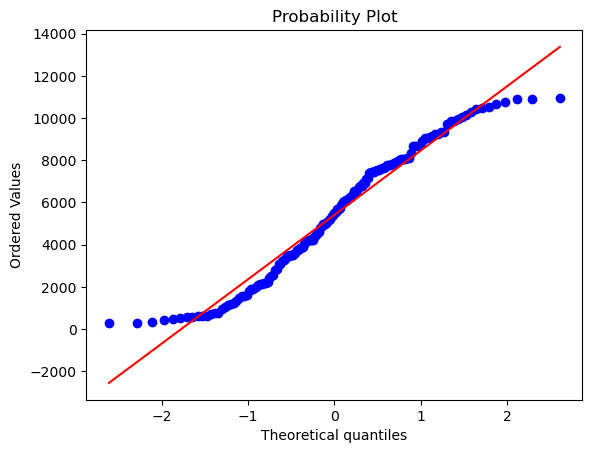

In [102]:
stats.probplot(cement.trans_cost, dist = 'norm', plot = pylab)

((array([-2.61052811, -2.29138561, -2.10856779, -1.97716758, -1.87303555,
         -1.7859691 , -1.71065377, -1.64395339, -1.58385546, -1.52898807,
         -1.47837218, -1.43128353, -1.38717057, -1.34560313, -1.3062389 ,
         -1.26880082, -1.23306129, -1.19883096, -1.16595048, -1.13428444,
         -1.10371673, -1.07414696, -1.04548773, -1.01766246, -0.9906036 ,
         -0.96425128, -0.93855212, -0.91345834, -0.88892699, -0.86491927,
         -0.8414    , -0.8183372 , -0.79570167, -0.77346668, -0.75160767,
         -0.73010204, -0.7089289 , -0.68806892, -0.66750414, -0.64721786,
         -0.62719452, -0.60741954, -0.58787931, -0.56856101, -0.54945261,
         -0.53054277, -0.51182078, -0.4932765 , -0.47490033, -0.45668315,
         -0.43861629, -0.42069149, -0.40290086, -0.38523685, -0.36769224,
         -0.35026009, -0.33293374, -0.31570677, -0.298573  , -0.28152644,
         -0.2645613 , -0.24767197, -0.23085299, -0.21409908, -0.19740505,
         -0.18076586, -0.16417656, -0.

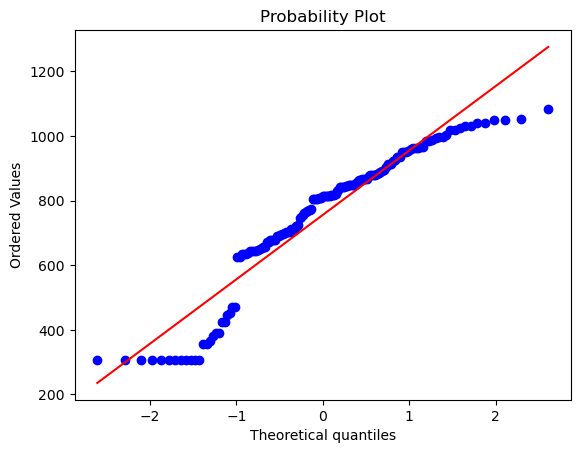

In [103]:
stats.probplot(cement.advert_cost, dist = 'norm', plot = pylab)

In [104]:
import seaborn as sns

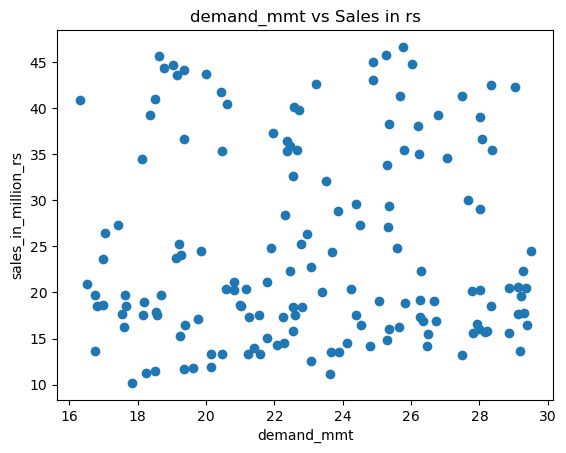

In [105]:
plt.scatter(x=cement['demand_mmt'], y=cement['sales_in_million_rs'])
plt.title('demand_mmt vs Sales in rs') #title
plt.xlabel('demand_mmt') #x label
plt.ylabel('sales_in_million_rs') #y label
plt.show()

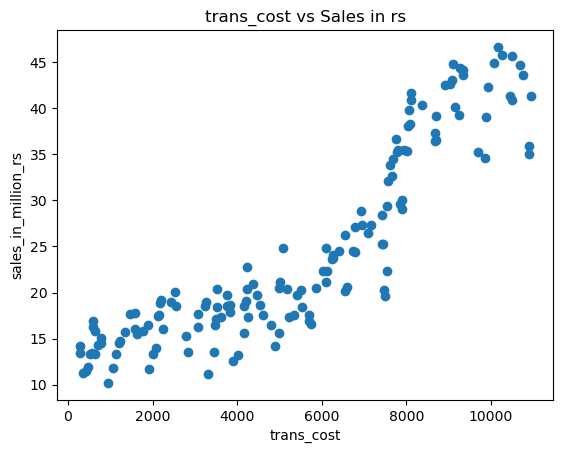

In [106]:
plt.scatter(x=cement['trans_cost'], y=cement['sales_in_million_rs'])
plt.title('trans_cost vs Sales in rs') #title
plt.xlabel('trans_cost') #x label
plt.ylabel('sales_in_million_rs') #y label
plt.show()

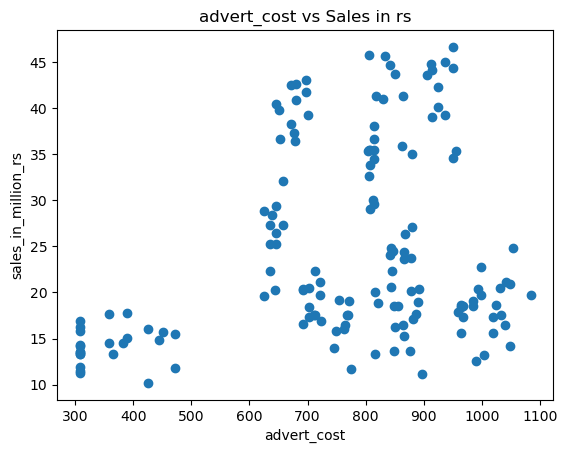

In [107]:
plt.scatter(x=cement['advert_cost'], y=cement['sales_in_million_rs'])
plt.title('advert_cost vs Sales in rs') #title
plt.xlabel('advert_cost') #x label
plt.ylabel('sales_in_million_rs') #y label
plt.show()

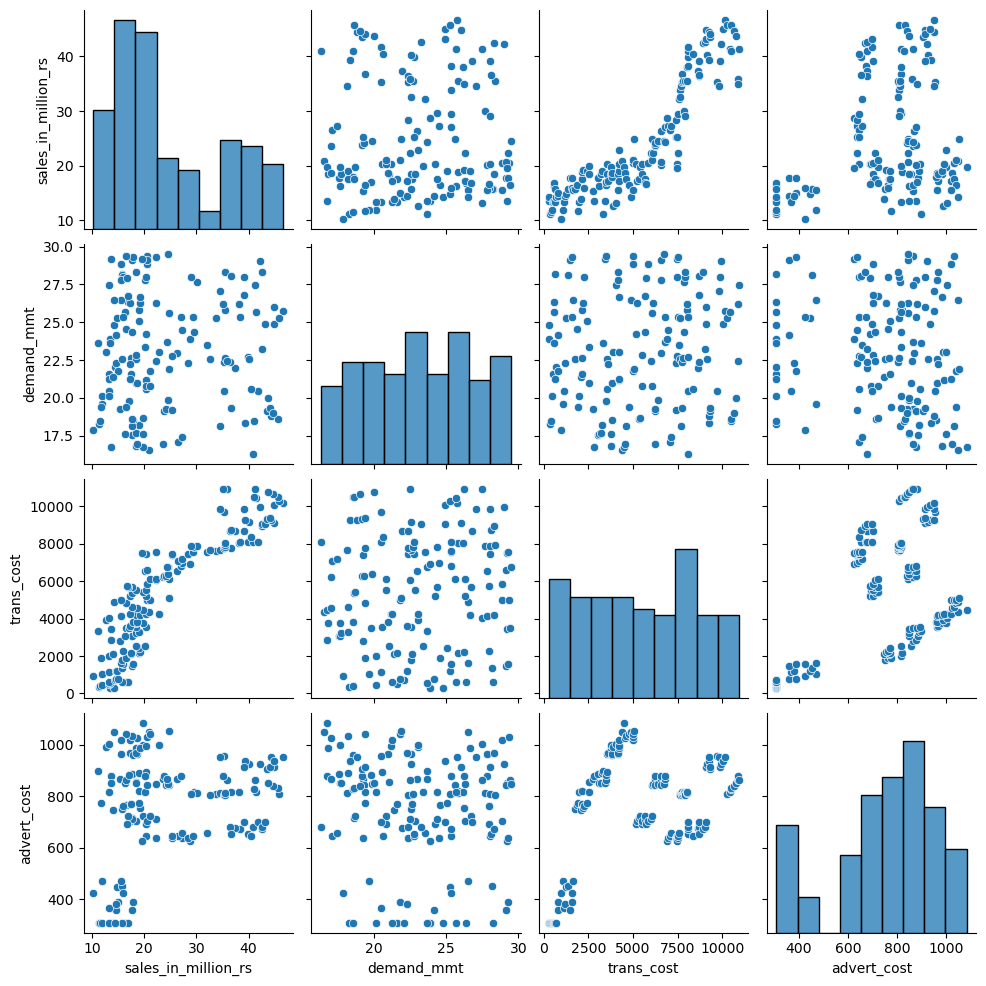

In [108]:
#Multivariate Analysis
#Pairplot 
sns.pairplot(cement.iloc[:, 2:])

Text(0.5, 1.0, 'sales_plot')

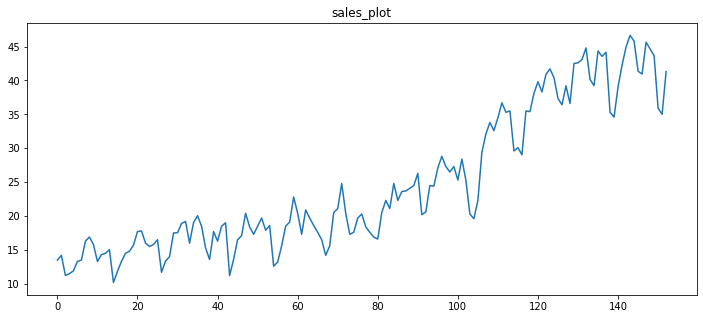

In [19]:
#Time Plot
cement['sales_in_million_rs'].plot(figsize=(12,5));plt.title("sales_plot")

Text(0.5, 1.0, 'demand_plot')

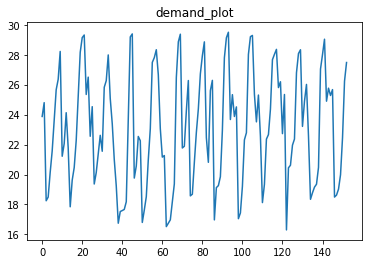

In [20]:
cement.demand_mmt.plot();plt.title("demand_plot")

Text(0.5, 1.0, 'transp_cost')

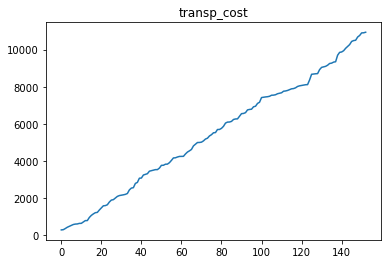

In [21]:
cement.trans_cost.plot();plt.title("transp_cost")

Text(0.5, 1.0, 'advert cost')

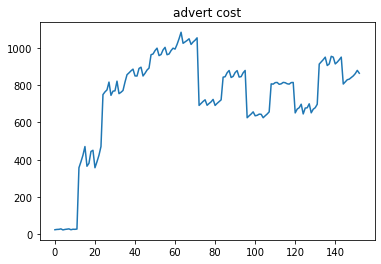

In [22]:
cement.advert_cost.plot();plt.title("advert cost")

In [14]:
#MODEL BUILDING
#SARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm

In [16]:
cement

,ID,date,sales_in_million_rs,demand_mmt,trans_cost,advert_cost
0,1,10-Apr,13.50,23.875925,276.79,25.364
1,2,10-May,14.20,24.797650,289.35,26.953
2,3,10-Jun,11.23,18.247675,351.05,27.541
3,4,10-Jul,11.50,18.493708,420.39,29.898
4,5,10-Aug,11.90,20.136737,470.64,24.364
...,...,...,...,...,...,...
148,149,22-Aug,44.64,19.024715,10677.84,840.910
149,150,22-Sep,43.65,19.982687,10761.47,849.740
150,151,22-Oct,35.90,22.459898,10899.79,862.030
151,152,22-Nov,35.00,26.236157,10905.59,879.340


In [17]:
target_col = 'demand_mmt'
dependent_cols = ['trans_cost', 'advert_cost']

In [18]:
# Split the data into train and test sets
train = cement.head(141)[[target_col] + dependent_cols]
test = cement.tail(12)[[target_col] + dependent_cols]

In [19]:
model = ARIMA(train[target_col], exog=train[dependent_cols], order=(2, 1, 2))

In [20]:
model_fit = model.fit()

In [21]:
start_index = len(train)
end_index = start_index + 11

In [22]:
predictions = model_fit.predict(start=start_index, end=end_index, exog=test[dependent_cols])

In [23]:
rmse = np.sqrt(((predictions - test[target_col]) ** 2).mean())

In [24]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [26]:
M8 = MAPE(predictions, test[target_col])

In [32]:
print(f"Mean Absolute Percentage: {M8}")

Mean Absolute Percentage: 18.06402852789063


In [39]:
#Auto Arima
model2 = auto_arima(train[target_col], exogenous=train[dependent_cols], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1290.735, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1135.416, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=734.533, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=736.016, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=985.181, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=700.817, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=720.449, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=703.752, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=681.651, Time=0.88 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=697.745, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=681.852, Time=0.89 

In [40]:
# Fit the best ARIMA model
model2.fit(train[target_col], exogenous=train[dependent_cols])

ARIMA(order=(3, 0, 3), scoring_args={}, suppress_warnings=True)

In [41]:
# Make predictions for the test set
predictions2 = model2.predict(start=start_index, end=end_index, exogenous=test[dependent_cols])

In [42]:
# Calculate the root mean squared error (RMSE)
rmse2 = np.sqrt(((predictions2 - test[target_col]) ** 2).mean())
print(f"RMSE: {rmse2}")

RMSE: 2.7094164169476658


In [43]:
M9 = MAPE(predictions2, test[target_col])
print(f"Mean Absolute Percentage Error: {M9}")

Mean Absolute Percentage Error: 10.83594950189824


In [50]:
#SARIMA Model
model3 = sm.tsa.statespace.SARIMAX(train[target_col], exog=train[dependent_cols], order=(2, 1, 2), seasonal_order=(0, 1, 1, 12))

In [51]:
model_fit3 = model3.fit()

In [52]:
# Make predictions for the test set
predictions3 = model_fit.predict(start=test.index[0], end=test.index[-1], exog=test[dependent_cols])

In [53]:
# Calculate the root mean squared error (RMSE)
rmse3 = ((predictions3 - test[target_col]) ** 2).mean() ** 0.5
print(f"RMSE: {rmse3}")

RMSE: 4.766017723710003


In [55]:
M10 = MAPE(predictions3, test[target_col])
print(f"Mean Absolute Percentage Error: {M10}")

Mean Absolute Percentage Error: 18.06402852789063


In [56]:
#MODEL BASED Aimport statsmodels.formula.api as smf 
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
import pylab as py
import statsmodels.graphics.tsaplots as tsa_plots

In [24]:
cement['t'] = np.arange(1, len(cement)+1)

In [25]:
cement['tsquare'] = cement['t'] * cement['t']

In [26]:
cement['log_demand'] =  np.log(cement['demand_mmt'])

In [27]:
cement = cement.drop(['ID'], axis = 1)

In [28]:
cement.columns

Index(['date', 'sales_in_million_rs', 'demand_mmt', 'trans_cost',
       'advert_cost', 't', 'tsquare', 'log_demand'],
      dtype='object')

In [29]:
cement = cement.iloc[:, [0,2,7,1,5,6,3,4]]

In [39]:
cement.date

0      1-Apr-10
1      1-May-10
2      1-Jun-10
3      1-Jul-10
4      1-Aug-10
         ...   
148    1-Aug-22
149    1-Sep-22
150    1-Oct-22
151    1-Nov-22
152    1-Dec-22
Name: date, Length: 153, dtype: object

In [42]:
q = cement['date'][0]
q[2:5]

'Apr'

In [43]:
cement['months'] = 0

In [44]:
for i in range(153):
    q = cement["date"][i]
    cement['months'][i]= q[2:5]

C:\Users\john\AppData\Local\Temp\ipykernel_1500\2036166962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cement['months'][i]= q[2:5]


In [45]:
month_dummies = pd.DataFrame(pd.get_dummies(cement['months']))
cement2 = pd.concat([cement, month_dummies], axis = 1)

Text(0.5, 1.0, 'Sales')

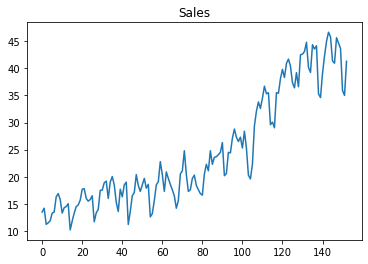

In [46]:
cement2.sales_in_million_rs.plot();plt.title('Sales')

Text(0.5, 1.0, 'Demand')

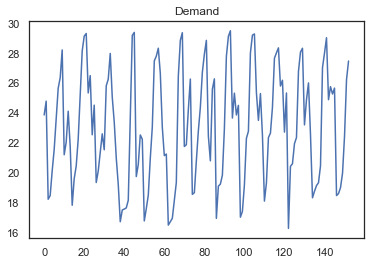

In [71]:
cement2.demand_mmt.plot();plt.title("Demand")

In [74]:
Train = cement2.head(141)
Test = cement2.tail(12)

In [76]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('demand_mmt ~ t', data = Train).fit()

In [77]:
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

In [82]:
rmse_linear = np.sqrt(np.mean((np.array(Test['demand_mmt']) - np.array(pred_linear))**2))
print(f"RMSE: {rmse_linear}")
M1 = MAPE(pred_linear, Test.demand_mmt)
print(f"Mean Absolute Percentage Error: {M1}")

RMSE: 3.5554327306420097
Mean Absolute Percentage Error: 14.430032384952318


In [80]:
Exp = smf.ols('log_demand ~ t', data = Train).fit()
pred_Exp = np.exp(pd.Series(Exp.predict(pd.DataFrame(Test['t']))))

In [83]:
rmse_Exp = np.sqrt(np.mean((np.array(Test['demand_mmt']) - np.array(pred_Exp))**2))
print(f"RMSE: {rmse_Exp}")
M2 = MAPE(pred_Exp, Test.demand_mmt)
print(f"Mean Absolute Percentage Error: {M2}")

RMSE: 3.5647799758235643
Mean Absolute Percentage Error: 14.460538788181823


In [84]:
#quadratic
Quad = smf.ols('demand_mmt ~ t + tsquare', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "tsquare"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['demand_mmt']) - np.array(pred_Quad))**2))
print(f"RMSE: {rmse_Quad}")
M3 = MAPE(pred_Quad, Test.demand_mmt)
print(f"Mean Absolute Percentage Error: {M3}")

RMSE: 3.5876274054237345
Mean Absolute Percentage Error: 14.462158011024782


In [85]:
#additive seasonality
add_sea = smf.ols('demand_mmt ~ Jan+ Feb +Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['demand_mmt']) - np.array(pred_add_sea))**2))
print(f"RMSE: {rmse_add_sea}")
M4 = MAPE(pred_add_sea, Test.demand_mmt)
print(f"Mean Absolute Percentage Error: {M4}")

RMSE: 1.2158478251397666
Mean Absolute Percentage Error: 4.06847029770111


In [87]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_demand ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = np.exp(pd.Series(Mul_sea.predict(Test)))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['demand_mmt']) - np.array(pred_Mult_sea))**2))
print(f"RMSE: {rmse_Mult_sea}")
M5 = MAPE(pred_add_sea, Test.demand_mmt)
print(f"Mean Absolute Percentage Error: {M5}")

RMSE: 1.2503802181512766
Mean Absolute Percentage Error: 4.06847029770111


In [90]:
#Additive Seasonality Quadratic Trend
add_sea_Quad = smf.ols('demand_mmt ~ t + tsquare+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','tsquare']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['demand_mmt'])-np.array(pred_add_sea_quad))**2))
print(f"RMSE: {rmse_add_sea_quad}") 
M6 = MAPE(pred_add_sea_quad, Test.demand_mmt)
print(f"Mean Absolute Percentage Error: {M6}")

RMSE: 1.3063522978991906
Mean Absolute Percentage Error: 5.028050377039623


In [92]:
#Multiplicative Seasonality Linear Trend
Mul_Add_sea = smf.ols('log_demand ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = np.exp(pd.Series(Mul_Add_sea.predict(Test)))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['demand_mmt']) - np.array(pred_Mult_add_sea))**2))
print(f"RMSE: {rmse_Mult_add_sea}")
M7 = MAPE(pred_Mult_add_sea, Test.demand_mmt)
print(f"Mean Absolute Percentage Error: {M7}")

RMSE: 1.1476860282360648
Mean Absolute Percentage Error: 4.270319576186686


In [93]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea", "ARIMA", "Auto_ARIMA", "SARIMA"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea, rmse, rmse2, rmse3])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,3.555433
1,rmse_Exp,3.564780
2,rmse_Quad,3.587627
3,rmse_add_sea,1.215848
4,rmse_add_sea_quad,1.306352
5,rmse_Mult_sea,1.250380
6,rmse_Mult_add_sea,1.147686
7,ARIMA,4.766018
8,Auto_ARIMA,2.709416
9,SARIMA,4.766018


In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt Winter's Exponential Smoothing

In [96]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [97]:
# Moving Average for the time series
mv_pred = cement["demand_mmt"].rolling(12).mean()

In [98]:
mv_pred.tail(12)

141    23.073231
142    23.213494
143    23.286422
144    23.224804
145    23.482738
146    23.495223
147    23.482423
148    23.471323
149    23.523915
150    23.689564
151    23.622509
152    23.578321
Name: demand_mmt, dtype: float64

In [99]:
MAPE(mv_pred.tail(12), Test.demand_mmt)

14.780953818723766

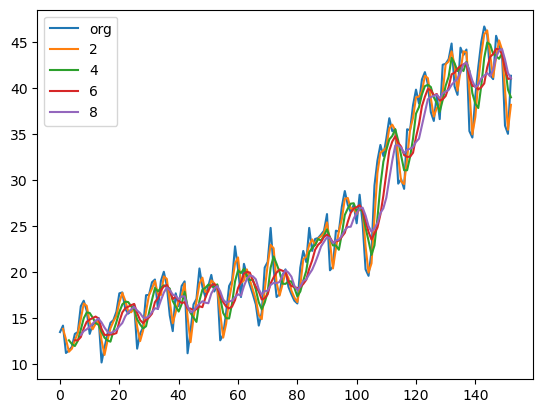

In [124]:
# Plot with Moving Averages
cement.sales_in_million_rs.plot(label = "org")
for i in range(2, 9, 2):
    cement["sales_in_million_rs"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 2)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
148   NaN
149   NaN
150   NaN
151   NaN
152   NaN
Name: trend, Length: 153, dtype: float64
0      0.565610
1      0.388994
2     -5.545334
3     -4.427682
4     -3.453895
         ...   
148   -3.453895
149   -2.182686
150   -0.776002
151    3.619146
152    5.007478
Name: seasonal, Length: 153, dtype: float64
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
148   NaN
149   NaN
150   NaN
151   NaN
152   NaN
Name: resid, Length: 153, dtype: float64
0      23.875925
1      24.797650
2      18.247675
3      18.493708
4      20.136737
         ...    
148    19.024715
149    19.982687
150    22.459898
151    26.236157
152    27.477699
Name: demand_mmt, Length: 153, dtype: float64


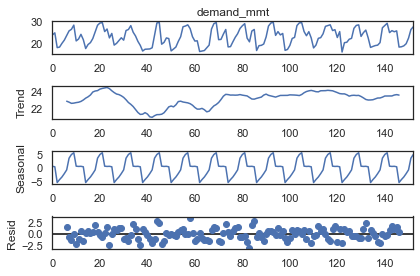

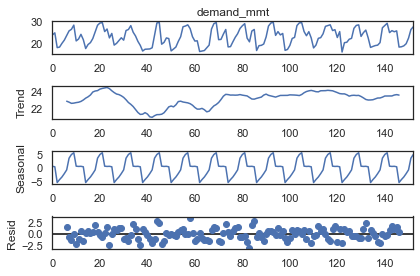

In [103]:
decompose_ts_add = seasonal_decompose(cement.demand_mmt, model = "additive", period = 12)
print(decompose_ts_add.trend)
print(decompose_ts_add.seasonal)
print(decompose_ts_add.resid)
print(decompose_ts_add.observed)
decompose_ts_add.plot()

# Time series decomposition is the process of separating data into its core components.
# Time series decomposition plot using Moving Average


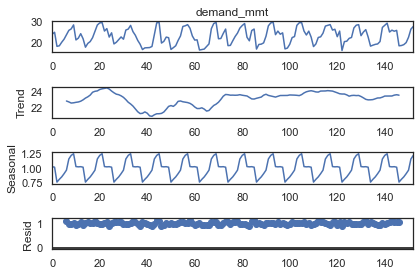

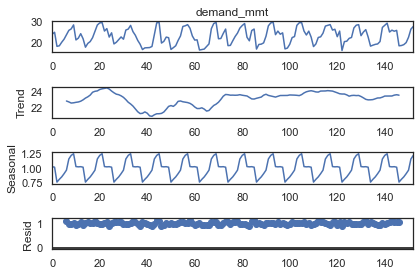

In [104]:
decompose_ts_mul = seasonal_decompose(cement.demand_mmt, model = "multiplicative", period = 12)
decompose_ts_mul.plot()

In [105]:
import statsmodels.graphics.tsaplots as tsa_plots

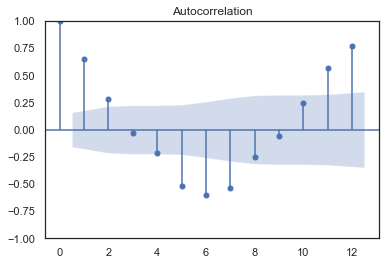

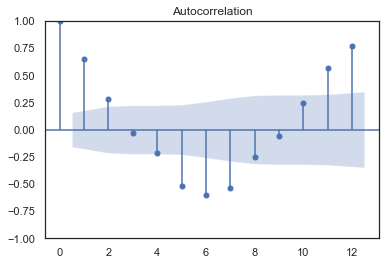

In [106]:
tsa_plots.plot_acf(cement.demand_mmt, lags = 12)

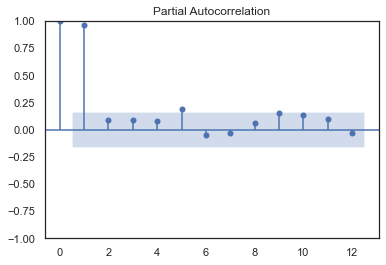

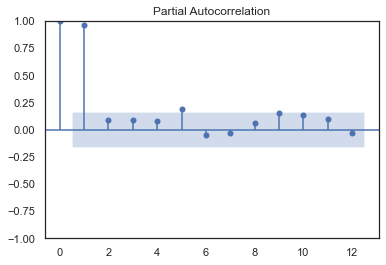

In [107]:
tsa_plots.plot_pacf(cement.sales_in_million_rs, lags=12)

In [108]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["demand_mmt"]).fit()

In [109]:
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])

In [112]:
rmse_ses = np.sqrt(((pred_ses - Test.demand_mmt) ** 2).mean())
print(f"RMSE: {rmse_ses}")
M11 = MAPE(pred_ses, Test.demand_mmt)
print(f"MAPE: {M11}")

RMSE: 5.6755946242048365
MAPE: 22.270338556590975


In [116]:
# Holt method 
hw_model = Holt(Train["demand_mmt"]).fit()

In [117]:
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])

In [118]:
rmse_hw = np.sqrt(((pred_hw - Test.demand_mmt) ** 2).mean())
print(f"RMSE: {rmse_hw}")
M12 = MAPE(pred_hw, Test.demand_mmt)
print(f"MAPE: {M12}")

RMSE: 5.843138899345911
MAPE: 23.10356881092048


In [120]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["demand_mmt"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()

In [122]:
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
rmse_hw_addd = np.sqrt(((pred_hwe_add_add - Test.demand_mmt) ** 2).mean())
print(f"RMSE: {rmse_hw_addd}")
M13 = MAPE(pred_hwe_add_add, Test.demand_mmt)
print(f"MAPE: {M13}")

RMSE: 1.462191399782652
MAPE: 4.67229920525119


In [123]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["demand_mmt"], seasonal = "mul", trend = "add", seasonal_periods = 12).fit()

In [124]:
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])

In [127]:
rmse_hw_addmul = np.sqrt(((pred_hwe_mul_add - Test.demand_mmt) ** 2).mean())
print(f"RMSE: {rmse_hw_addmul}")
M14 = MAPE(pred_hwe_mul_add, Test.demand_mmt)
print(f"MAPE: {M14}")

RMSE: 1.4652459370008186
MAPE: 4.646101038150465


In [128]:
#Comparing all models
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea", "ARIMA", "Auto_ARIMA", "SARIMA", "SimpleExpSmt", "Holt_method", "hw_exp_add_add", "hwe_exp_mul_Add"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea, rmse, rmse2, rmse3, rmse_ses, rmse_hw, rmse_hw_addd, rmse_hw_addmul]), "Mean_abs%_err": pd.Series([M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values,Mean_abs%_err
0,rmse_linear,3.555433,14.430032
1,rmse_Exp,3.564780,14.460539
2,rmse_Quad,3.587627,14.462158
3,rmse_add_sea,1.215848,4.068470
4,rmse_add_sea_quad,1.306352,4.068470
5,rmse_Mult_sea,1.250380,5.028050
6,rmse_Mult_add_sea,1.147686,4.270320
7,ARIMA,4.766018,18.064029
8,Auto_ARIMA,2.709416,10.835950
9,SARIMA,4.766018,18.064029


In [129]:
model_full = hwe_model_add_add = ExponentialSmoothing(cement["demand_mmt"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()

In [130]:
pred_new  = hwe_model_add_add.predict(start = len(cement), end = len(cement)+11)

In [131]:
pred_new

153    28.494755
154    23.433721
155    23.329438
156    23.346595
157    23.252493
158    17.276268
159    18.292005
160    19.287392
161    20.570459
162    22.007854
163    26.362647
164    27.743260
dtype: float64

In [132]:
model_full.save("model_p.pickle")

In [133]:
from statsmodels.regression.linear_model import OLSResults

In [134]:
model_best = OLSResults.load("model_p.pickle")